# PyGeM

## Tutorial 1: Free Form Deformation on a sphere in STL file format

In this tutorial we will show the typical workflow. In particular we are going to parse the parameters file for the FFD, read an STL file of a sphere, perform the FFD and write the results on a new file.

First of all we just import the required PyGeM classes and we set matplotlib for the notebook.

In [1]:
%matplotlib inline
from pygem import FFDParameters, FFD, StlHandler

We need to specify the parameters of the deformation. We can set manually, editing directly the `FFDParameters` attributes, or we can read them by parsing a file. It is also possible write an instance to a file, in order to edit this file for the future deformations.

In [2]:
params = FFDParameters()
params.read_parameters(filename='../tests/test_datasets/parameters_test_ffd_sphere.prm')

The following is the parameters file for the case at hand. In particular, if you look at the Box info section, there is 3-by-2-by-2 lattice around an emisphere. Then we rotate it by 10 deg around y and 15 deg around z axis. In Parameters weights we just change the weights of the control point with indices 2, 0, 0.

In [3]:
%cat ../tests/test_datasets/parameters_test_ffd_sphere.prm


[Box info]
# This section collects all the properties of the FFD bounding box.

# n control points indicates the number of control points in each direction (x, y, z).
# For example, to create a 2 x 3 x 2 grid, use the following: n control points: 2, 3, 2
n control points x: 3
n control points y: 2
n control points z: 2

# box lenght indicates the length of the FFD bounding box along the three canonical directions (x, y, z).
# It uses the local coordinate system.
# For example to create a 2 x 1.5 x 3 meters box use the following: lenght box: 2.0, 1.5, 3.0
box lenght x: 45.0
box lenght y: 90.0
box lenght z: 90.0

# box origin indicates the x, y, and z coordinates of the origin of the FFD bounding box. That is center of
# rotation of the bounding box. It corresponds to the point coordinates with position [0][0][0].
# See section "Parameters weights" for more details.
# For example, if the origin is equal to 0., 0., 0., use the following: origin box: 0., 0., 0.
box origin x: -20.0
box ori

Now we have to load the STL file on which we will perform the FFD. Since it is an STL we use the `StlHandler` class. The `parse` method extracts the points coordinate without touching the topology of the geometry.

In [4]:
stl_handler = StlHandler()
mesh_points = stl_handler.parse('../tests/test_datasets/test_sphere.stl')

This is the original geometry:

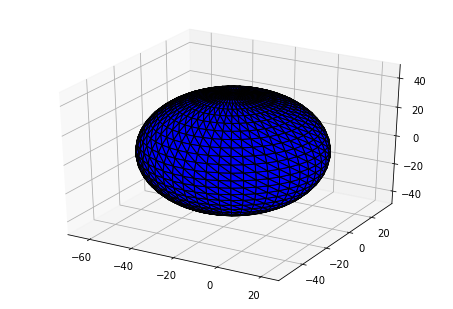

In [5]:
fig = stl_handler.plot(plot_file='../tests/test_datasets/test_sphere.stl')

Finally we can actually perform the FFD. The inputs are the parameters we already set and the points positions we extracted before.

In [6]:
free_form = FFD(params, mesh_points)
free_form.perform()
new_mesh_points = free_form.modified_mesh_points

Now we can write the modified STL file with the new points coordinates.

In [7]:
stl_handler.write(new_mesh_points, 'test_sphere_mod.stl')

And here we have the final plot:

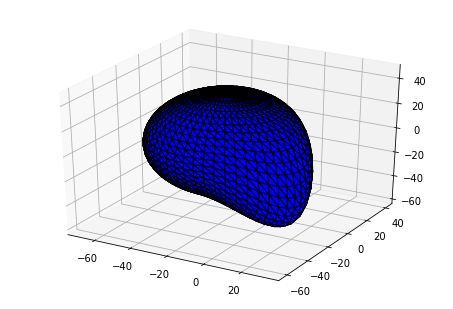

In [8]:
fig = stl_handler.plot(plot_file='test_sphere_mod.stl')